In [19]:
from dataset import prepare_data
from util import format_float as f
import matplotlib.pyplot as plt
import numpy as np
import os
from dotenv import load_dotenv

load_dotenv()

True

In [20]:
dataset = prepare_data(os.getenv('KVASIR_GRADCAM_CSV'))

N = dataset.shape[0]
labels = list(set(dataset["label"]))

dataset.head()

,path,label,code,bbox
0,./data/hyper-kvasir/segmented-images/images,polyp,7e340833-b661-4357-a099-b8cd65c5e3f5,"[0, 1, 201, 262]"
1,./data/hyper-kvasir/segmented-images/images,polyp,4cf65c05-5568-463f-aa07-7ad9bd4a1216,"[245, 395, 354, 458]"
2,./data/hyper-kvasir/labeled-images/lower-gi-tr...,ulcerative-colitis-grade-2,3a8ee05a-c58e-4f77-afae-e7a24e386a91,[]
3,./data/hyper-kvasir/labeled-images/lower-gi-tr...,ulcerative-colitis-grade-2,8c8fcc36-ef80-4fa3-a4ef-1cb9cefa59d6,[]
4,./data/hyper-kvasir/labeled-images/lower-gi-tr...,cecum,1ffaefc6-75a0-4049-8be1-c3a4e84abad1,[]


In [21]:
dataset.describe()

,path,label,code,bbox
count,12353,12353,12353,12353
unique,25,24,11252,1692
top,./data/hyper-kvasir/labeled-images/lower-gi-tr...,polyp,4604cf0d-7992-48a4-baba-51768bcf0469,[]
freq,1148,2099,11,10662


Dataset are not balanced due to the fact that some findings appear more than others. 

In [22]:
labels_count = {}

for label in labels:
    labels_count[label] = len(dataset[dataset['label'] == label])

labels_count = dict(sorted(labels_count.items(), key=lambda item: item[1], reverse=True))

for l in labels_count:
    print(f"Label: {l}, n: {labels_count[l]}/{N} - {f(labels_count[l]/N * 100)}%")

Label: polyp, n: 2099/12353 - 16.99%
Label: bbps-2-3, n: 1148/12353 - 9.29%
Label: cecum, n: 1009/12353 - 8.17%
Label: dyed-lifted-polyps, n: 1002/12353 - 8.11%
Label: pylorus, n: 999/12353 - 8.09%
Label: dyed-resection-margins, n: 989/12353 - 8.01%
Label: z-line, n: 932/12353 - 7.54%
Label: retroflex-stomach, n: 764/12353 - 6.18%
Label: bbps-0-1, n: 646/12353 - 5.23%
Label: instrument, n: 620/12353 - 5.02%
Label: ulcerative-colitis-grade-2, n: 443/12353 - 3.59%
Label: esophagitis-a, n: 403/12353 - 3.26%
Label: retroflex-rectum, n: 391/12353 - 3.17%
Label: esophagitis-b-d, n: 260/12353 - 2.10%
Label: ulcerative-colitis-grade-1, n: 201/12353 - 1.63%
Label: ulcerative-colitis-grade-3, n: 133/12353 - 1.08%
Label: impacted-stool, n: 131/12353 - 1.06%
Label: barretts-short-segment, n: 53/12353 - 0.43%
Label: barretts, n: 41/12353 - 0.33%
Label: ulcerative-colitis-grade-0-1, n: 35/12353 - 0.28%
Label: ulcerative-colitis-grade-2-3, n: 28/12353 - 0.23%
Label: ulcerative-colitis-grade-1-2, n: 1

A causa di una presenza di sbilanciamento nella distribuzione dei dati tra le classi, si è scelto di fare data augmentation sulle classi con presenza più bassa, in particolare su quelle classi con meno di 400 campioni presenti.

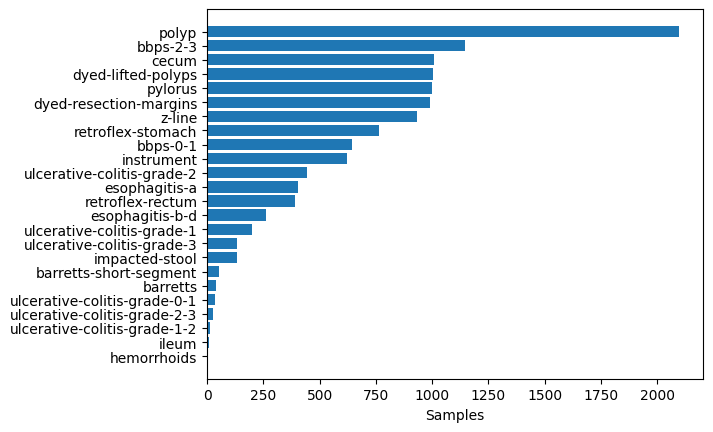

In [23]:
labels = labels_count.keys()
values = labels_count.values()

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.barh(x, values, align='center')

ax.set_yticks(x, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Samples")

plt.show()

Il codice per la data augmentation è presente nel file dataset.py, sotto il metodo __prepare_data__.

Facciamo una veloce analisi dei dati come fatta subito prima ma per il dataset comprensivo di immagini aumentate.

In [24]:
aug_dataset = prepare_data(os.getenv('KVASIR_GRADCAM_CSV_AUG'), aug=True)

aug_N = aug_dataset.shape[0]
aug_labels = list(set(aug_dataset["label"]))

aug_dataset.head()

,path,label,code,bbox
0,./data/augmentation,ulcerative-colitis-grade-1,c611d035-224b-43d6-8fd1-50b9e3fee462-aug-2,[]
1,./data/augmentation,ulcerative-colitis-grade-2-3,a8c7e976-6ce0-49a4-a992-4c55d1de67c3-aug-11,[]
2,./data/augmentation,retroflex-rectum,21b6bf87-d174-40af-825a-100eddcb1a49-aug-1,[]
3,./data/hyper-kvasir/labeled-images/lower-gi-tr...,bbps-2-3,7cc18a66-0468-4006-9ff9-c0edb0e846c6,[]
4,./data/hyper-kvasir/labeled-images/lower-gi-tr...,dyed-lifted-polyps,d947f73c-ac40-498d-94f4-00162ad2664b,[]


In [25]:
aug_dataset.describe()

,path,label,code,bbox
count,18001,18001,18001,18001
unique,26,24,16900,1692
top,./data/augmentation,polyp,4604cf0d-7992-48a4-baba-51768bcf0469,[]
freq,5648,2099,11,16310


In [26]:
aug_labels_count = {}

for label in aug_labels:
    aug_labels_count[label] = len(aug_dataset[aug_dataset['label'] == label])

aug_labels_count = dict(sorted(aug_labels_count.items(), key=lambda item: item[1], reverse=True))

for l in aug_labels_count:
    print(f"Label: {l}, n: {aug_labels_count[l]}/{aug_N} - {f(aug_labels_count[l]/aug_N * 100)}%")

Label: polyp, n: 2099/18001 - 11.66%
Label: retroflex-rectum, n: 1173/18001 - 6.52%
Label: bbps-2-3, n: 1148/18001 - 6.38%
Label: cecum, n: 1009/18001 - 5.61%
Label: dyed-lifted-polyps, n: 1002/18001 - 5.57%
Label: pylorus, n: 999/18001 - 5.55%
Label: dyed-resection-margins, n: 989/18001 - 5.49%
Label: z-line, n: 932/18001 - 5.18%
Label: esophagitis-b-d, n: 780/18001 - 4.33%
Label: retroflex-stomach, n: 764/18001 - 4.24%
Label: ulcerative-colitis-grade-3, n: 665/18001 - 3.69%
Label: impacted-stool, n: 655/18001 - 3.64%
Label: bbps-0-1, n: 646/18001 - 3.59%
Label: instrument, n: 620/18001 - 3.44%
Label: ulcerative-colitis-grade-1, n: 603/18001 - 3.35%
Label: barretts-short-segment, n: 477/18001 - 2.65%
Label: ulcerative-colitis-grade-0-1, n: 455/18001 - 2.53%
Label: barretts, n: 451/18001 - 2.51%
Label: ulcerative-colitis-grade-2-3, n: 448/18001 - 2.49%
Label: ulcerative-colitis-grade-2, n: 443/18001 - 2.46%
Label: ulcerative-colitis-grade-1-2, n: 418/18001 - 2.32%
Label: ileum, n: 414/

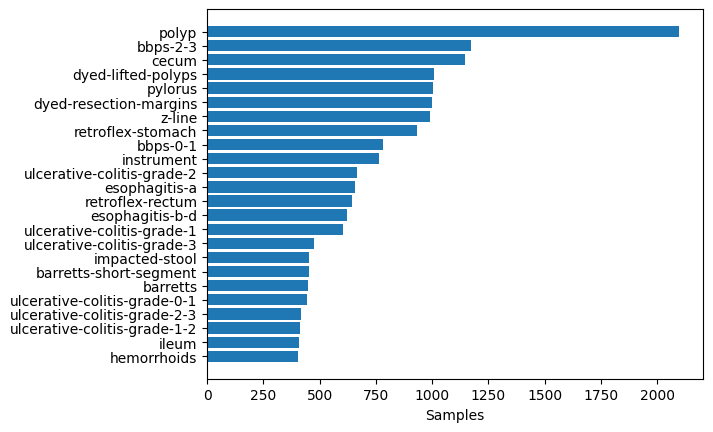

In [27]:
aug_values = aug_labels_count.values()

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.barh(x, aug_values, align='center')

ax.set_yticks(x, labels=labels)
ax.invert_yaxis()
ax.set_xlabel("Samples")

plt.show()